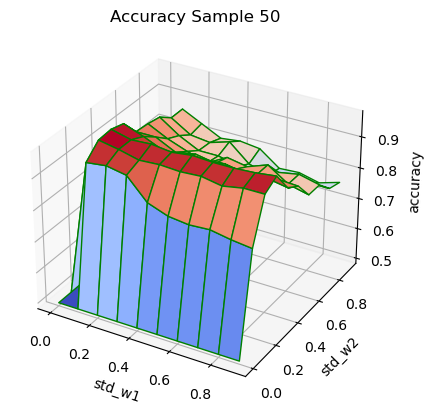

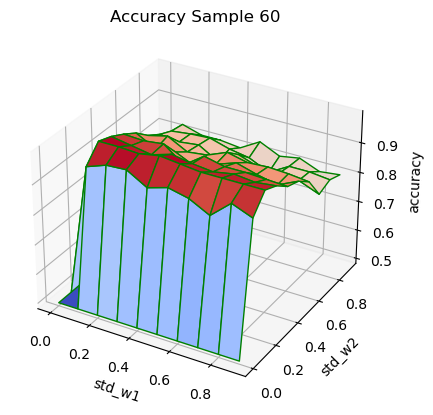

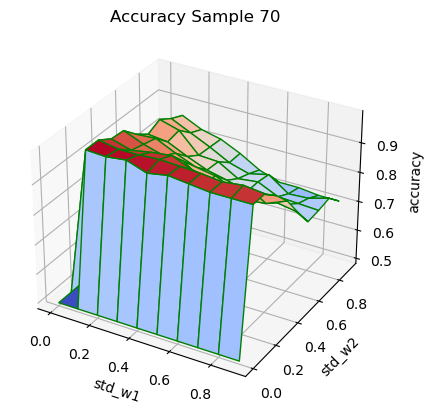

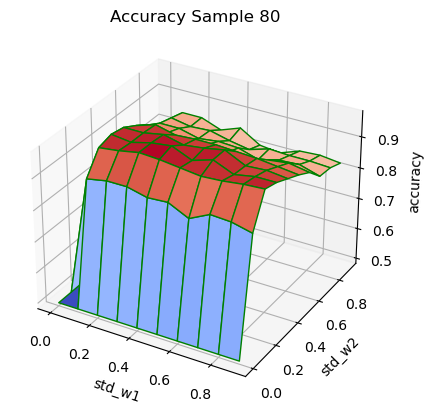

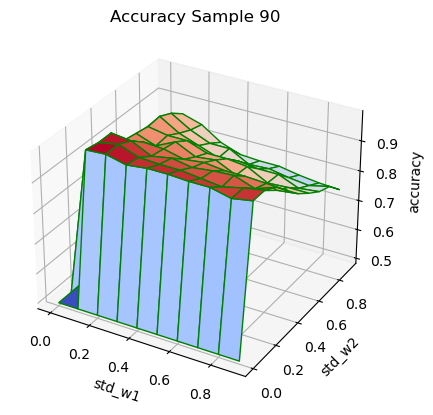

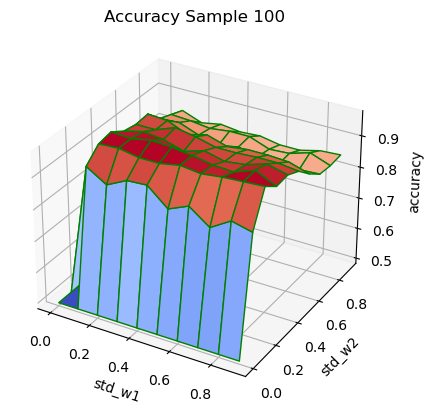

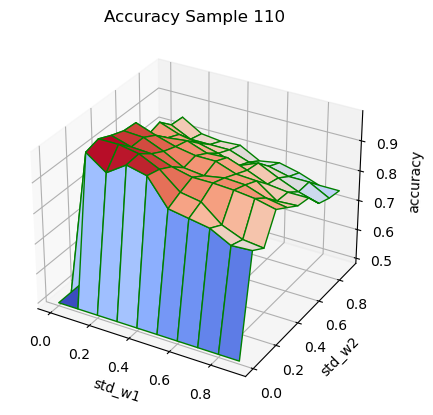

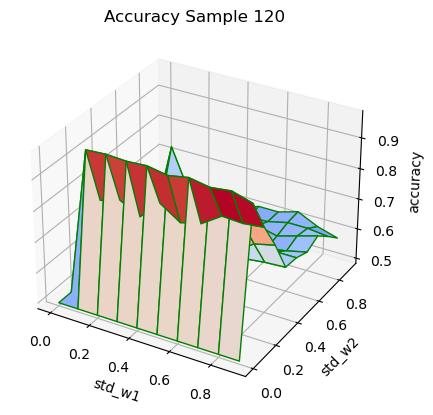

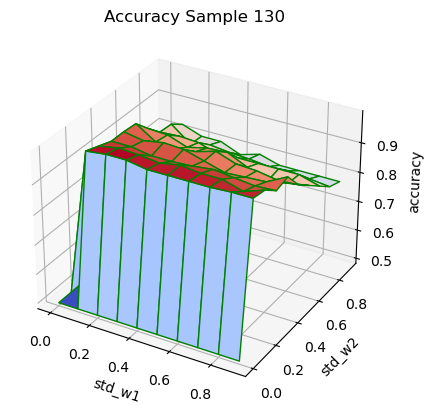

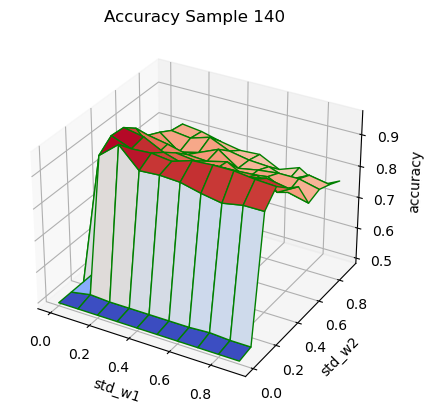

In [13]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input250sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(std_w_range,std_w_range)
accuracy_10_samples = np.zeros((10,10,10))
for (i,sample) in zip(range(len(sample_list)),sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['accuracy_w1_w2'], cmap ='coolwarm', edgecolor ='green')
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_zlabel('accuracy')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("250_inputs_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in zip(range(len(axis_std_w1)),axis_std_w1):
        for (k,std_w2) in zip(range(len(axis_std_w2)), axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]


In [14]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.9078125 , 0.90429688, 0.90976563, 0.89414063,
        0.88007813, 0.87617188, 0.86875   , 0.87265625, 0.865625  ],
       [0.4921875 , 0.94804687, 0.95625   , 0.940625  , 0.94453125,
        0.934375  , 0.92929688, 0.92539063, 0.92617187, 0.9296875 ],
       [0.4921875 , 0.92460937, 0.9140625 , 0.91015625, 0.9125    ,
        0.90976563, 0.91640625, 0.915625  , 0.91835937, 0.9203125 ],
       [0.4921875 , 0.90507812, 0.89960938, 0.89101562, 0.87578125,
        0.88203125, 0.88632813, 0.88007813, 0.88359375, 0.88359375],
       [0.4921875 , 0.88828125, 0.86835938, 0.8703125 , 0.85976562,
        0.86523438, 0.86171875, 0.85351562, 0.84726563, 0.85234375],
       [0.4921875 , 0.86523438, 0.86601562, 0.84257812, 0.83867187,
        0.84609375, 0.83164063, 0.8265625 , 0.82109375, 0.81289062],
       [0.4921875 , 0.85234375, 0.8386718

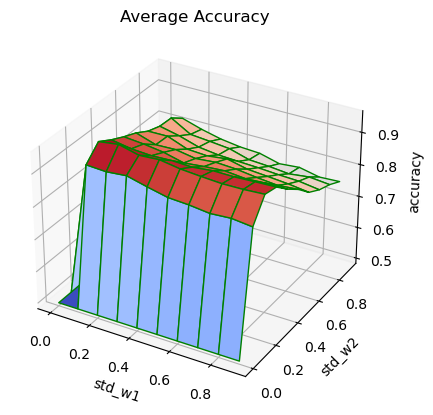

In [15]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', edgecolor ='green')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_zlabel('accuracy')
ax.set_title('Average Accuracy')
fig.savefig("250_inputs_average_accuracy_grid_over_10_samples.png".format(sample))

In [16]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_accuracy_grid_10_by_10_10_samples.shape)

In [17]:
best_w1_w2

(2, 2)

In [18]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

In [19]:
average_accuracy_grid_10_by_10_10_samples[2]

array([0.4921875 , 0.94804687, 0.95625   , 0.940625  , 0.94453125,
       0.934375  , 0.92929688, 0.92539063, 0.92617187, 0.9296875 ])

In [20]:
average_accuracy_grid_10_by_10_10_samples[:,2]

array([0.4921875 , 0.90429688, 0.95625   , 0.9140625 , 0.89960938,
       0.86835938, 0.86601562, 0.83867187, 0.81445312, 0.80234375])

In [21]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
std_dev_w1 = np.std(average_accuracy_grid_10_by_10_10_samples[2])
std_dev_w2 = np.std(average_accuracy_grid_10_by_10_10_samples[:,2])

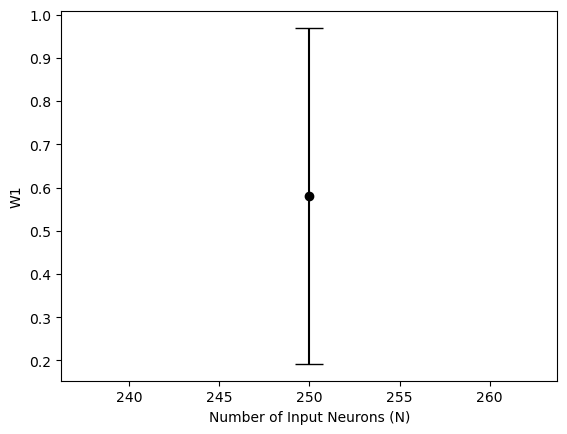

In [22]:
fig, ax = plt.subplots()
ax.scatter(250, array_best_w1_best_w2[0]/0.3445, color="k")
ax.errorbar(250, array_best_w1_best_w2[0]/0.3445, std_dev_w1/0.3445, capsize = 10.0, color= "k")
ax.set_xlabel("Number of Input Neurons (N)")
ax.set_ylabel("W1")
fig.savefig("input250forW1.png")

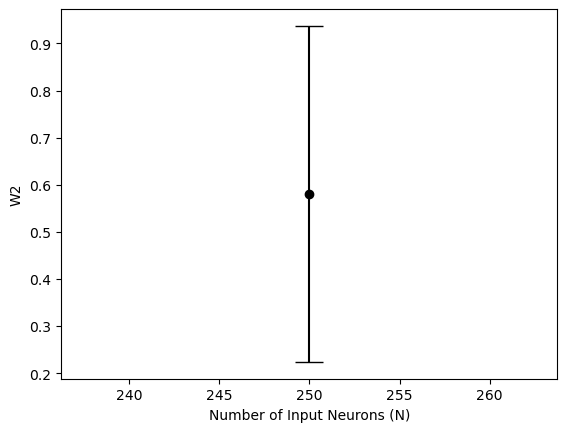

In [23]:
fig2, ax2 = plt.subplots()
ax2.scatter(250, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(250, array_best_w1_best_w2[1]/0.3445, std_dev_w2/0.3445, capsize=10.0, color= "k")
ax2.set_xlabel("Number of Input Neurons (N)")
ax2.set_ylabel("W2")
fig2.savefig("input250forW2.png")

In [24]:
data = {}
data['N'] = 250
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = std_dev_w1/0.3445
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = std_dev_w2/0.3445
np.savez("250_input_neurons_w1_w2.npz",**data)